# 前回作成したモデルで2方向の推論をさせてみる

とりあえず、データを作成する。データは2つの線量データを読み込み足し合わせることで作成することとする。

（どこかにメモしないと忘れそうなので、ここにメモをする。）

多出力のネットワークを定義したが、updateがどのように行われているのか。出力が複数の場合正解ラベルがに種類用意されていることになる。

単純に考えると、勾配法で求める極値が複雑になることで、学習に要する時間の増大や精度の低下が予想される。今後、エネルギーを推論する際にエネルギーを推論するネットワークを作成するか出力を増やすか

どちらが賢明なのか考える必要がある。

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Allocation GPU hardware ID = 0
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[1], 'GPU')

2022-12-08 10:24:09.253086: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-08 10:24:11.421449: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-08 10:24:11.422236: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-08 10:24:12.535909: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:84:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.665GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-12-08 10:24:12.536213: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451

In [3]:
dir_name = "data_05" 
theta = 0
file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for phi in range(-45,46)]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

In [4]:
print(data.shape)

(91, 61, 61, 150, 1)


In [25]:
p_point = []
conb_data = []
for i in range(91):
    for j in range(91):
        new_data = data[i] + data[j]
        conb_data.append(new_data)
        
        p_point.append((i,j))

In [6]:
np.array(conb_data).shape

(8281, 61, 61, 150, 1)

In [7]:
conb_data = np.array(conb_data)

In [8]:
model = tf.keras.models.load_model("model_two_output")

2022-12-08 10:24:56.767237: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 10:24:56.771703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-08 10:24:56.771766: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-08 10:24:56.771824: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-08 10:24:56.771856: I tensorflow/stream_executor/platform/

In [9]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 61, 61, 150, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 30, 30, 75, 1 144         input_8[0][0]                    
__________________________________________________________________________________________________
normalize_1 (BatchNormalization (None, 30, 30, 75, 1 64          conv3d_1[0][0]                   
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 15, 15, 37, 3 4128        normalize_1[0][0]                
____________________________________________________________________________________________

~~~
pred = model.predict(conb_data)
~~~

そのままだと数が多すぎて無理みたい。

In [10]:
rand = np.array([np.random.randint(8281) for i in range(100)])

In [33]:
test_data = np.array([conb_data[i] for i in rand])
test_p = np.array([p_point[i] for i in rand])

In [17]:
pred_t, pred_p = model.predict(test_data)

In [15]:
import matplotlib.pyplot as plt

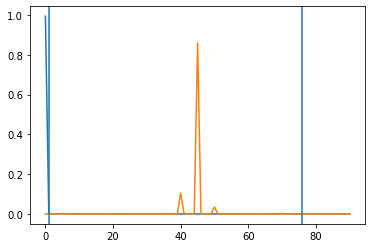

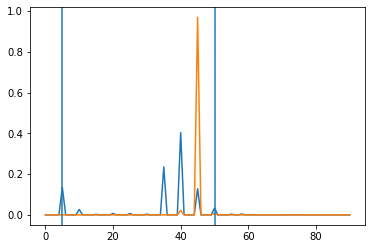

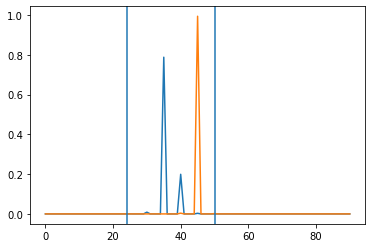

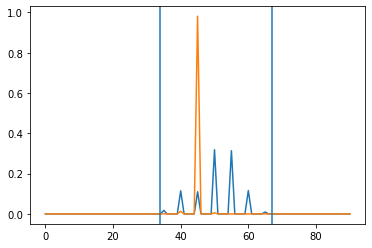

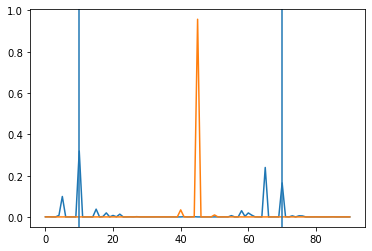

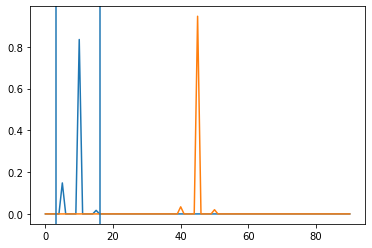

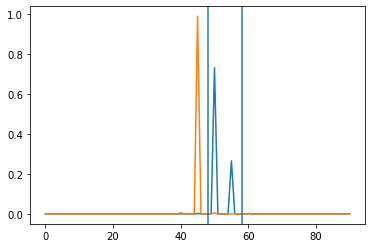

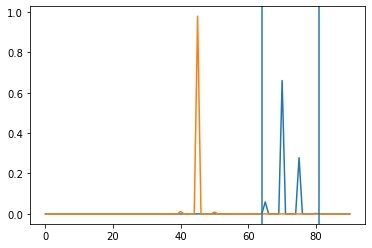

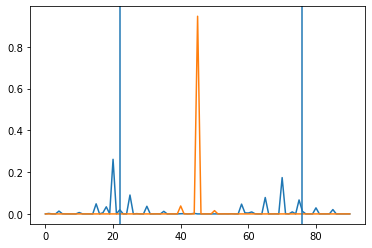

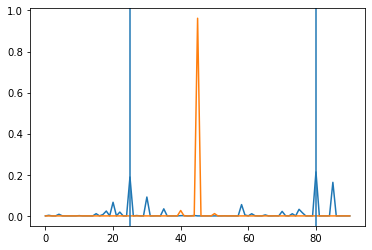

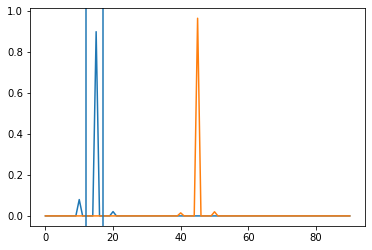

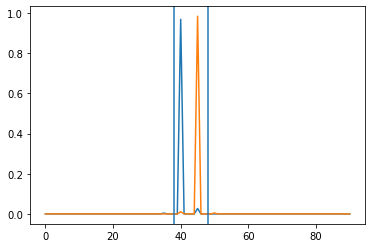

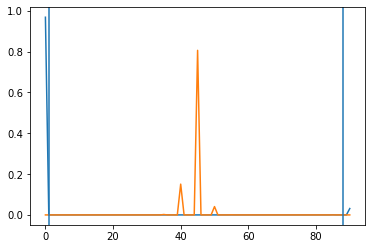

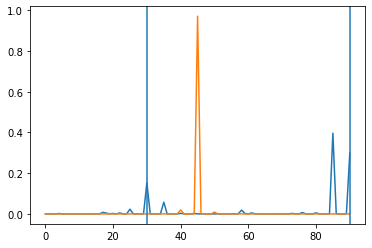

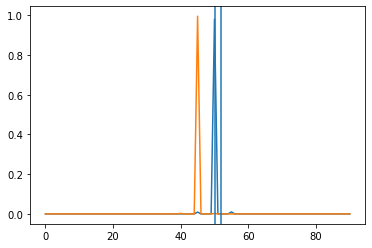

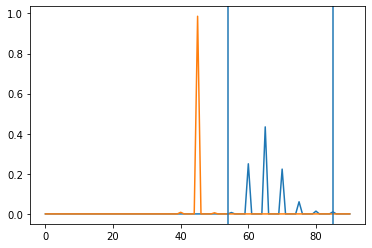

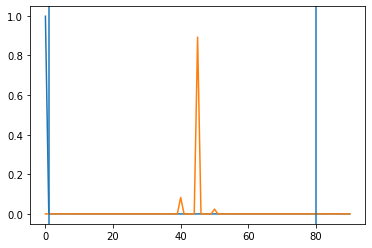

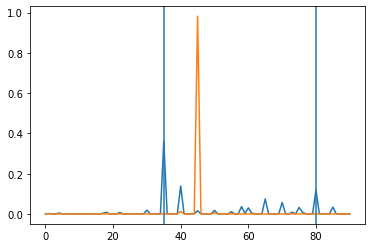

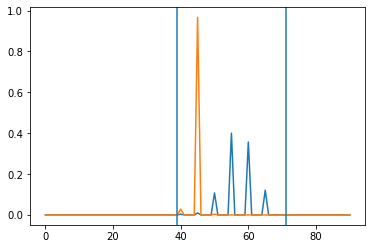

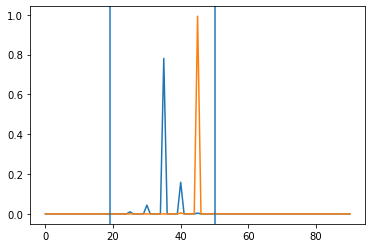

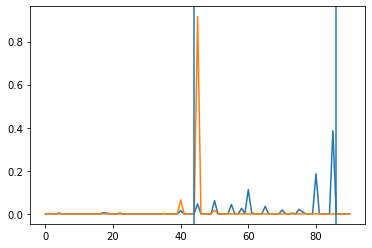

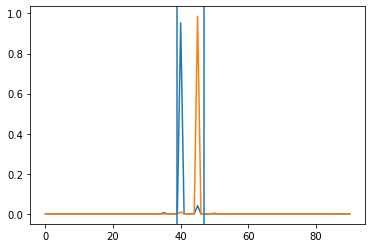

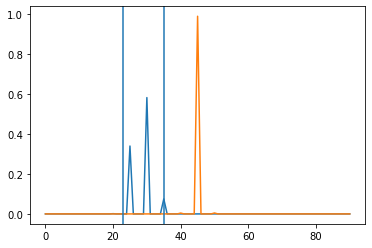

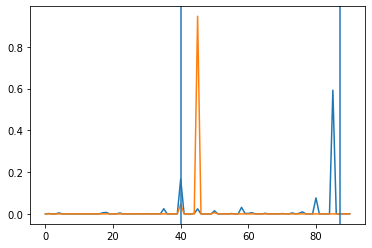

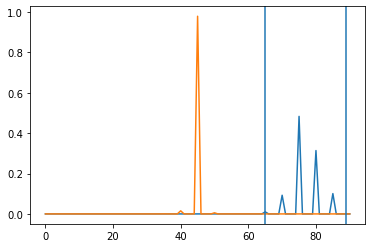

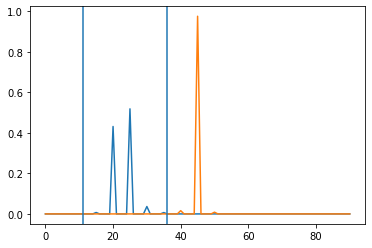

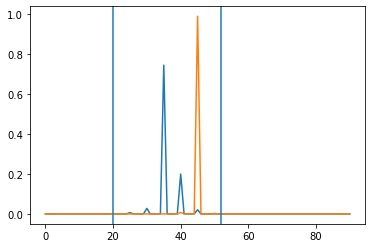

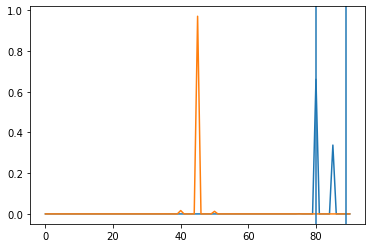

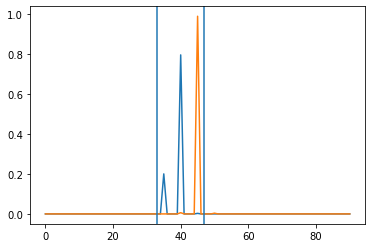

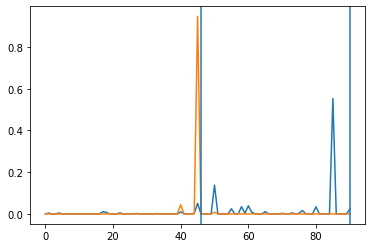

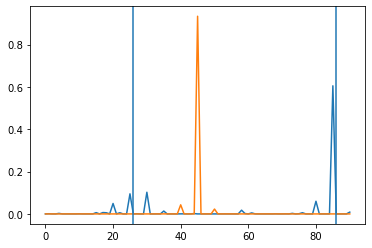

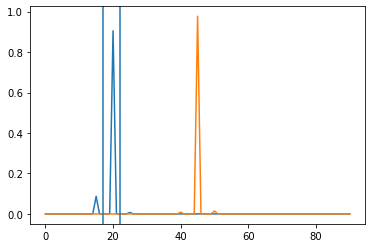

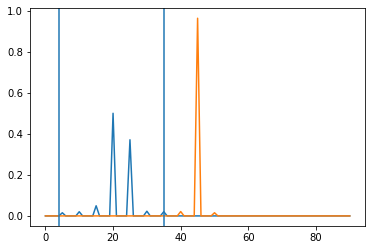

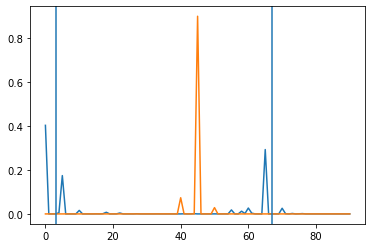

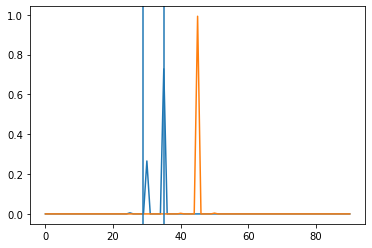

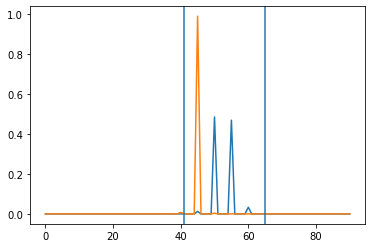

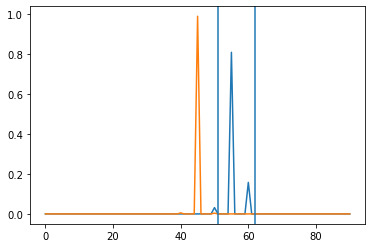

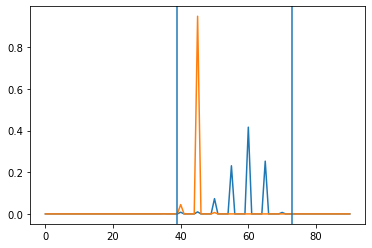

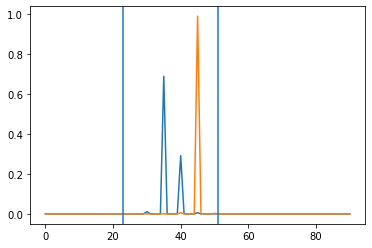

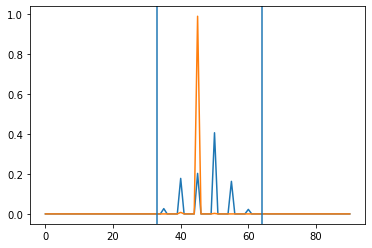

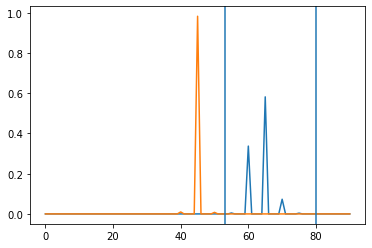

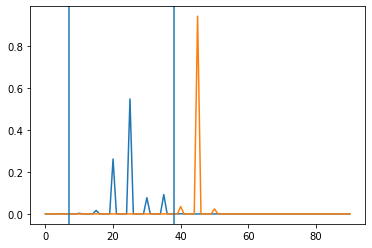

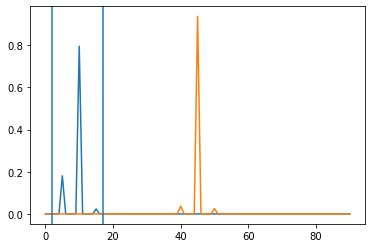

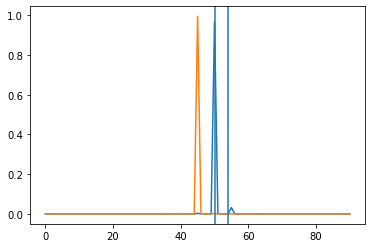

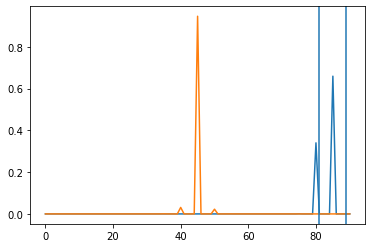

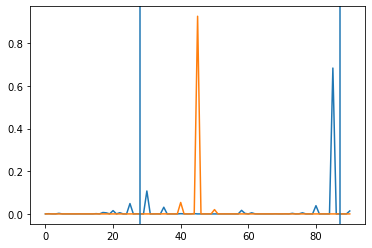

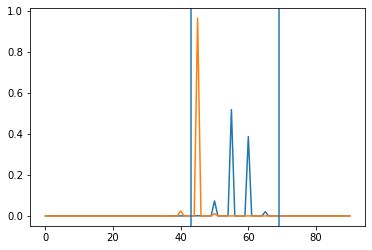

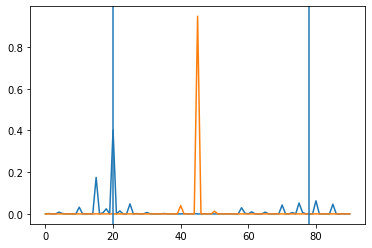

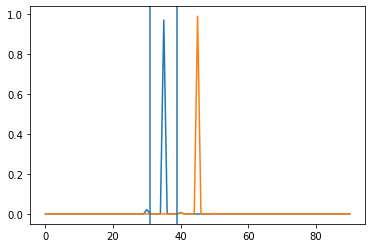

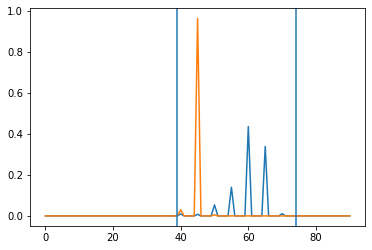

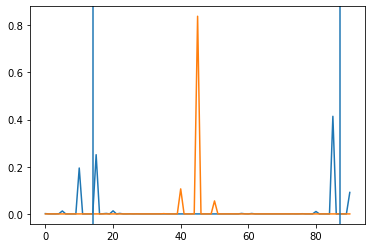

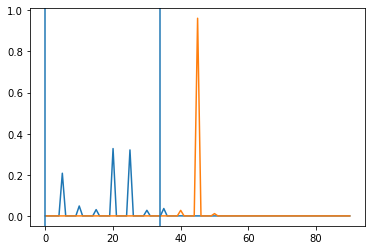

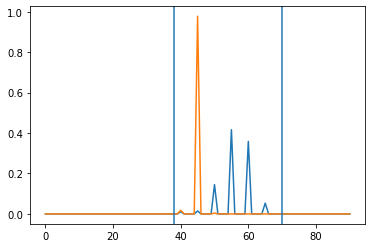

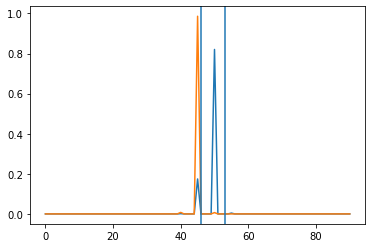

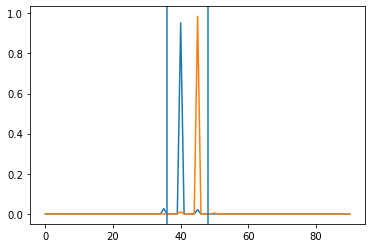

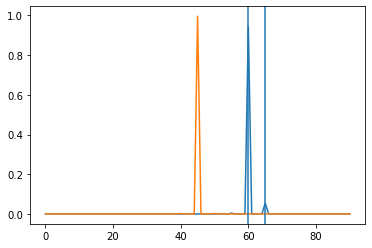

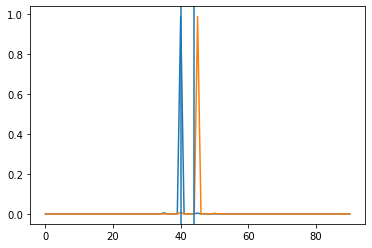

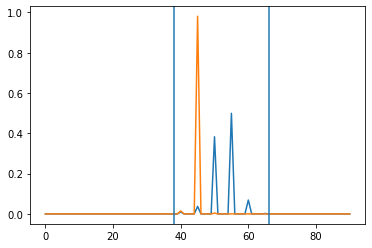

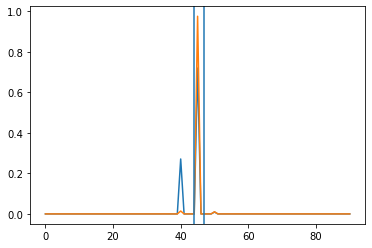

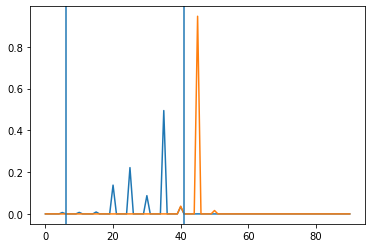

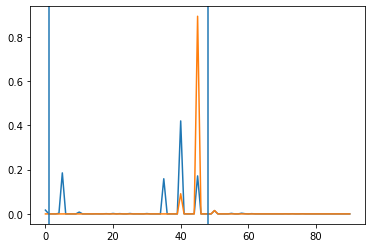

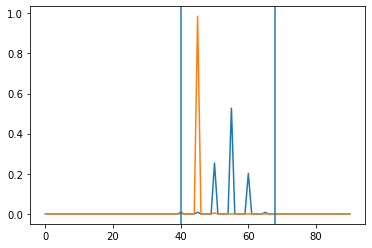

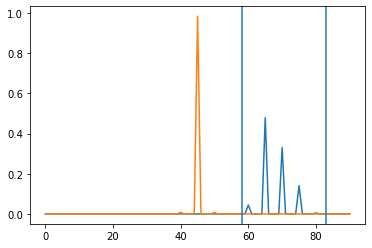

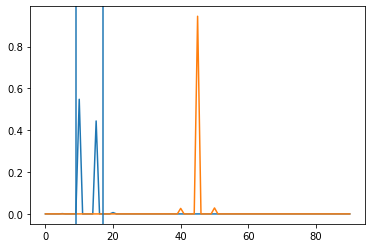

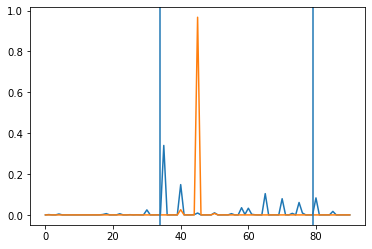

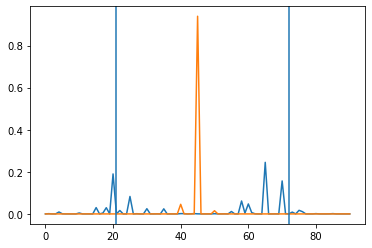

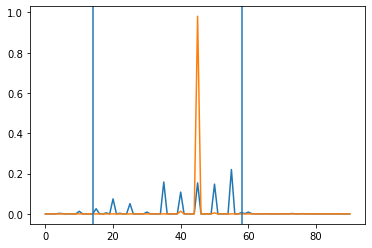

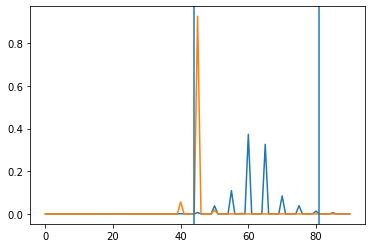

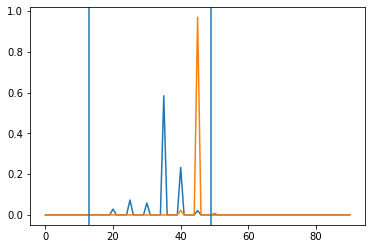

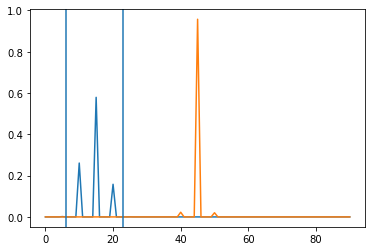

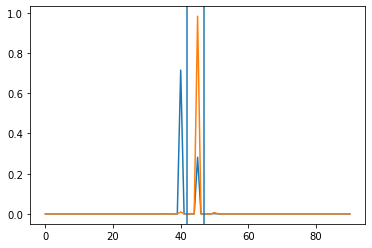

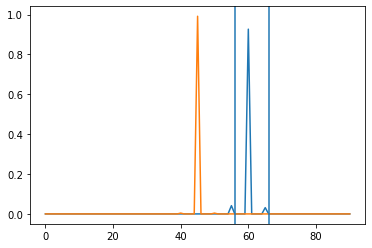

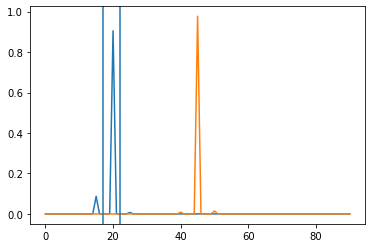

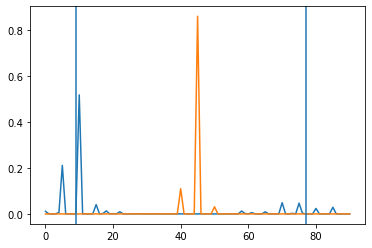

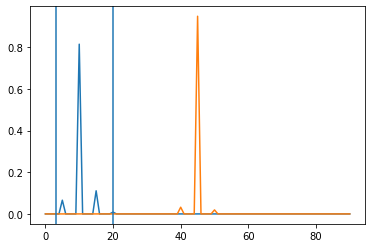

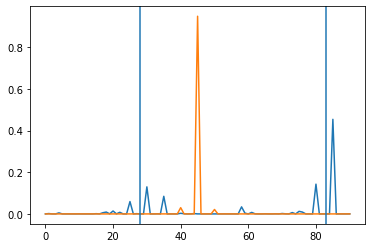

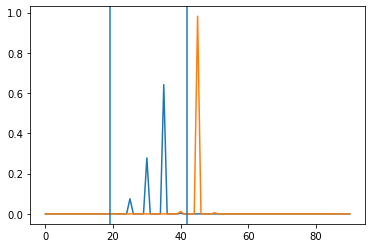

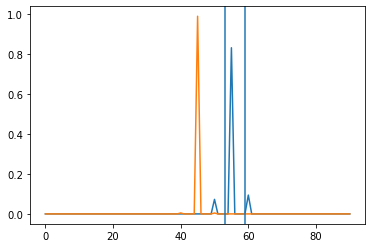

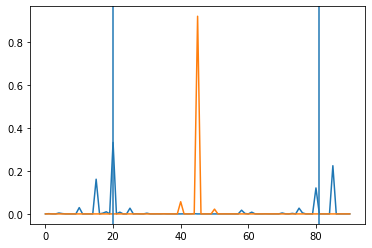

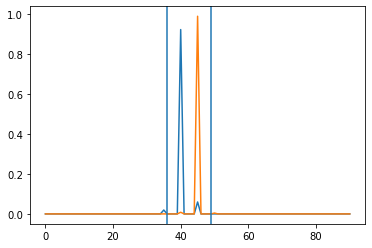

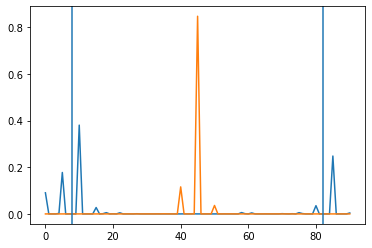

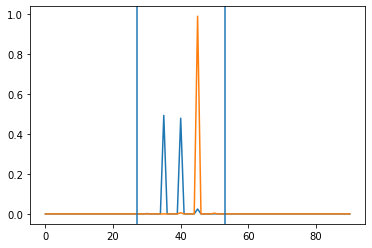

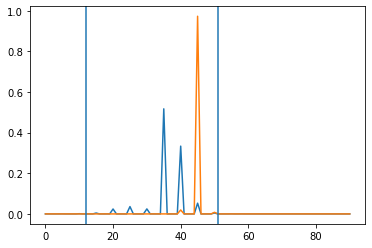

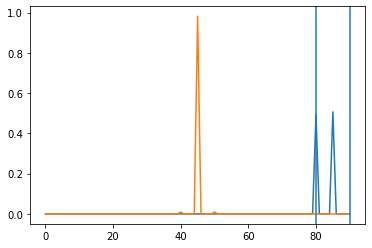

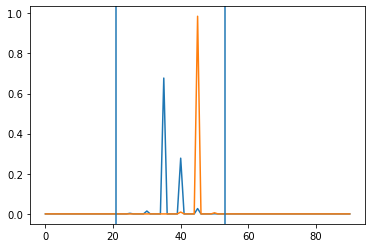

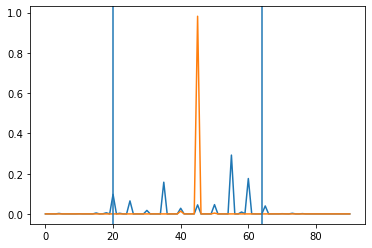

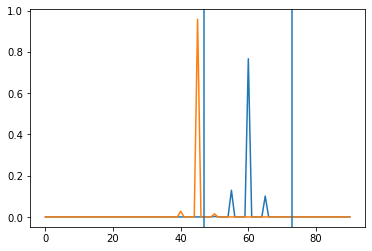

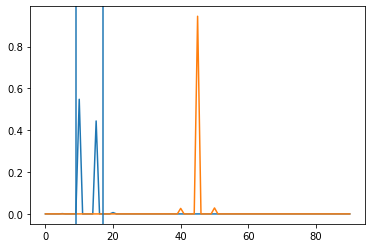

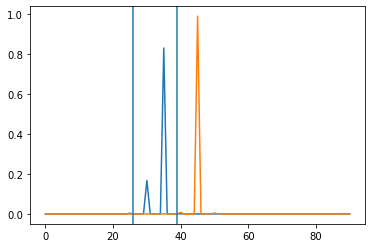

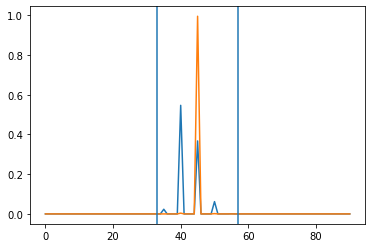

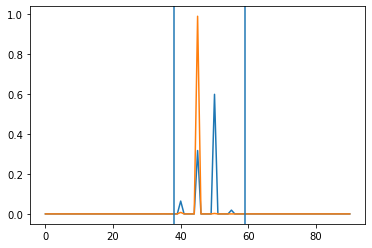

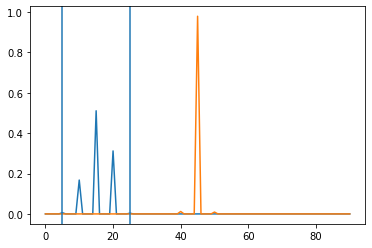

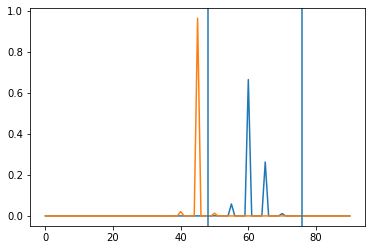

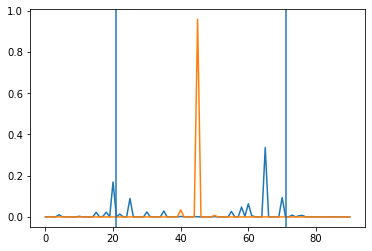

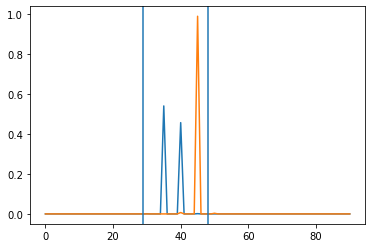

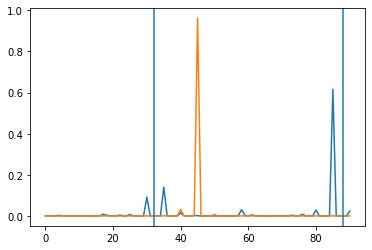

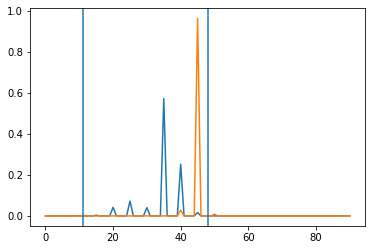

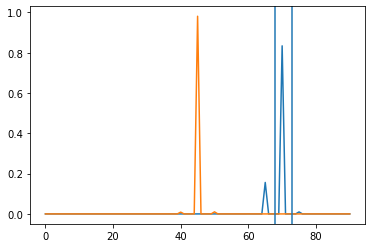

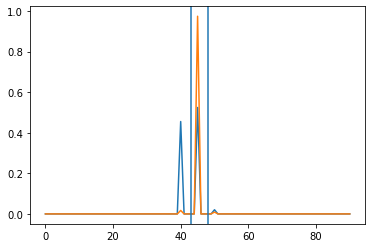

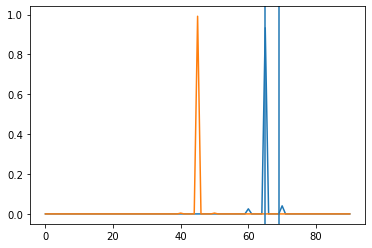

In [34]:
for n in range(100):
    plt.plot(pred_p[n])
    plt.plot(pred_t[n])
    plt.axvline(test_p[n][0])
    plt.axvline(test_p[n][1])
    plt.show()
    plt.close()

複数の組み合わせについて学習させていないので、当然と言えば当然かもしれない。

二つの角度の間の値が出る場合と、ピークが二つに見える場合の2パターンがある。

学習用のデータが膨大になる事が不安。とりあえず、データを作成する。